<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
<b>نتفلیکس</b>
</font>
</h2>


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مقدمه
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در این تمرین نمودار‌هایی را با توجه داده‌های شرکت نتفلیکس رسم می‌کنیم و با توجه به آنها تحلیل‌هایی ارائه می‌کنیم.
<br>
کتابخانه‌هایی که برای مصورسازی استفاده می‌کنیم مت‌پلات‌لیب، پلاتلی و سیبورن خواهند بود.
</font>
</p>


In [234]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import plotly as py
import plotly.graph_objs as go
import os
py.offline.init_notebook_mode(connected = True)
import datetime as dt
plt.rcParams['figure.dpi'] = 140


<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در بخش اول کمی تمیزکاری در داده‌ها خواهیم داشت.
<br>
در ستون‌های cast , director به جای مقادیر خالی عبارت "No Data" قرار دهید و در بقیه ردیف‌هایی که مقادیر خالی دارند را حذف کنید.
<br>
در انتها نباید هیچ مقدار خالی و گم‌شده‌ای وجود داشته باشد.
</font>
</p>


In [235]:
netflix_df = pd.read_csv('netflix_titles.csv',na_values=[''],parse_dates=['date_added'])


In [236]:
netflix_df['director'].fillna('No Data',inplace=True)
netflix_df['cast'].fillna('No Data',inplace=True)

In [237]:
netflix_df.dropna(inplace=True)

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در بخش بعدی با توجه به ستون date_added ستون‌های:
    <br>
    month_added (ماهی که فیلم اضافه شده)<br>
    month_name_added (نام ماهی که فیلم اضافه شده مثلا ژانویه)<br>
    year_added (سالی که فیلم اضافه شده) را اضافه کنید  
</font>
</p>


In [238]:
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'],format='mixed')
netflix_df['month_added'] = netflix_df['date_added'].dt.month
netflix_df['month_name_added'] = netflix_df['date_added'].dt.strftime('%B')
netflix_df['year_added'] = netflix_df['date_added'].dt.year

In [239]:
netflix_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added
0,s1,TV Show,3%,No Data,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,8,August,2020
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,12,December,2016
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",12,December,2018
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",11,November,2017
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,1,January,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7781,s7782,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",1,January,2020
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...",2020-10-19,2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,10,October,2020
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,3,March,2019
7785,s7786,TV Show,Zumbo's Just Desserts,No Data,"Adriano Zumbo, Rachel Khoo",Australia,2020-10-31,2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,10,October,2020


<h2 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
نمودار اول (نسبت فیلم‌ها و سریال‌ها)
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    در این نمودار با استفاده از متد <b>barh</b> نشان دهید که چند درصد محتواها فیلم و چند درصد سریال هستند.
    <br>
    جزئیاتی که باید در نمودار رعایت کنید :
    <br>
</font>    
</p>

<ul style="direction: rtl;text-align: right;", face="vazir" size=3>

<li>
    figsize = (6.5, 2.5)
</li>    
<li>
رنگ بخش فیلم‌ها: #b20710 
</li>     
    
<li>
رنگ بخش سریال‌ها:
    #221f1f 
</li>   

<li>    
alplha: 0.9    
</li>    
   
  
<li> محور‌های دور نمودار را حذف کنید (می‌توانید کلید واژه spines 
را جستجو کنید)
    </li>   
<li>
    fontfamily = serif
</li>   
    

</ul>    


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


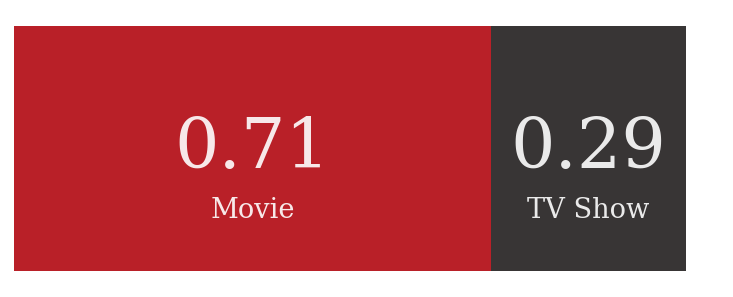

In [240]:
fig_ratio, ax_ratio = plt.subplots(figsize=(6.5,2.5),facecolor='white')


film_perc = (netflix_df[netflix_df['type']=='Movie'].count()['type']/(netflix_df.count()['type'])).round(2)
tv_perc = (netflix_df[netflix_df['type']=='TV Show'].count()['type']/(netflix_df.count()['type'])).round(2)

film_bar = ax_ratio.barh(film_perc,film_perc,color='#b20710',alpha=0.9)
tv_bar = ax_ratio.barh(film_perc,tv_perc,left=film_perc,color='#221f1f',alpha=0.9)

#ax_ratio.bar_label(film_bar,label_type='center',fontfamily='serif',labels=[])
#ax_ratio.bar_label(tv_bar,label_type='center',fontfamily='serif',)

ax_ratio.text(film_perc/2,film_perc,f'{film_perc}',ha='center',va='center',fontfamily=['serif'],alpha=0.9,fontsize=36,color='white')
ax_ratio.text(1-tv_perc/2,film_perc,f'{tv_perc}',ha='center',va='center',fontfamily=['serif'],alpha=0.9,fontsize=36,color='white')
ax_ratio.text(film_perc/2,film_perc-0.2,'Movie',ha='center',va='center',fontfamily=['serif'],alpha=0.9,fontsize=14,color='white')
ax_ratio.text(1-tv_perc/2,film_perc-0.2,'TV Show',ha='center',va='center',fontfamily=['serif'],alpha=0.9,fontsize=14,color='white')

ax_ratio.legend().set_visible(False)
ax_ratio.set_xticks([])
ax_ratio.set_yticks([])
ax_ratio.spines[:].set_visible(False);

<h2 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
نمودار دوم (ده کشور برتر)
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    در این نمودار با استفاده از یک نمودار میله‌ای، ده کشوری که بیشترین محتوا در نتفلیکس دارند را نشان دهید.
    اگر بیش از یک کشور در ساخت محتوا مشارکت داشتند کشور اولی که در لیست آمده را در نظر بگیرید. مثلا اگر یک فیلم محصول مشترک امریکا،انگلیس و آلمان است. شما امریکا را در نظر بگیرید.
    <br>
    جزئیاتی که باید در نمودار رعایت کنید :
    <br>
</font>    
</p>

<ul style="direction: rtl;text-align: right;", face="vazir" size=3>

<li>
    figsize = (12, 6)
</li>    
    
<li>
رنگ میله سه کشور اول:
    #b20710
</li>     
    
<li>
رنگ میله باقی کشورها: 
    #f5f5f1 
</li>   

<li>    
alplha: 0.9    
</li>    
   
  
<li> محور‌های بالا، چپ و راست را حذف کنید (می‌توانید کلید واژه spines 
را جستجو کنید)
    </li>   
    

<li>    
نام United States را به US و United Kingdom را به UK و South Korea را به S. Korea تغییر دهید. 
</li> 
    
<li>
fontfamily = serif
</li>   
    
<li>
    alignment متن‌ها را center قرار دهید 
</li>    

<li>
labelsize=12
<br>
length = 0 ( در tick_params )    
</li>    
    
<li>
محور افقی با گام ۵۰۰
</li>    
</ul>    


In [241]:
netflix_df.head(3)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added
0,s1,TV Show,3%,No Data,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,8,August,2020
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,12,December,2016
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",12,December,2018


In [242]:
def change(x):
    return x.split(',')
        
netflix_df['country'] = netflix_df['country'].apply(change)


In [243]:
def set_country(a):
    return a[0]
netflix_df['country'] = netflix_df['country'].apply(set_country)

In [244]:
def change2(d):
    if 'United States' == d :
        d = 'USA'
    elif 'United Kingdom' == d:
        d = 'UK'
    elif 'South Korea' == d:
        d = 'S. Korea'
    
    return d

netflix_df['country'] = netflix_df['country'].apply(change2)

In [245]:
my_plot = netflix_df['country'].value_counts()[:10]
my_plot.values[0]

2874

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


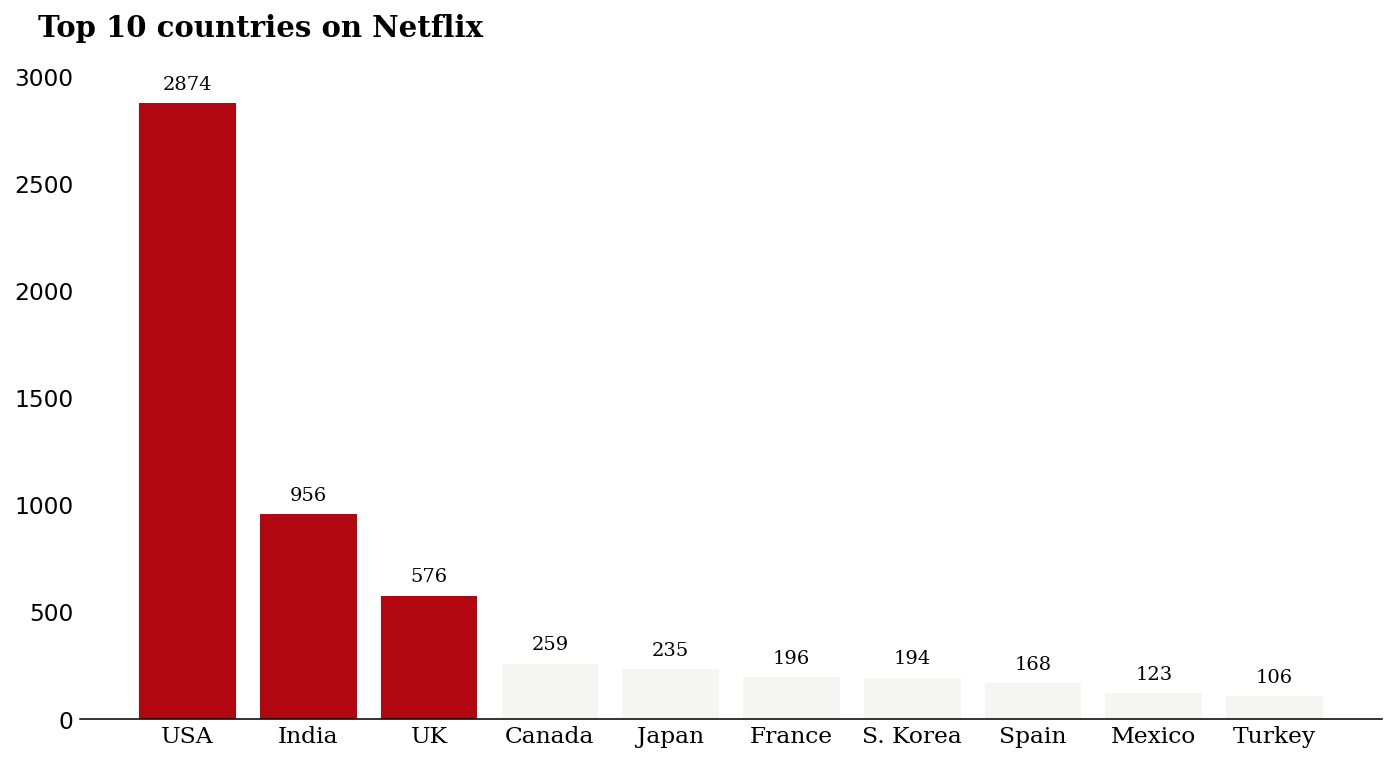

In [246]:
fig_top10, ax_top10 = plt.subplots(figsize=(12,6))

my_plot = netflix_df['country'].value_counts()[:10]
colors = ['#b20710','#b20710','#b20710','#f5f5f1','#f5f5f1','#f5f5f1','#f5f5f1','#f5f5f1','#f5f5f1','#f5f5f1']

bars =  ax_top10.bar(my_plot.index,my_plot.values,color=colors,align='center')
fig_top10.suptitle('Top 10 countries on Netflix', x=0.1, y=.95, horizontalalignment='left', verticalalignment='top', fontsize = 15,fontfamily='serif',fontweight='bold')
ax_top10.set_xticks(np.arange(10))
ax_top10.tick_params(labelsize=12,length=0)

ax_top10.bar_label(bars,label_type='edge',fontfamily='serif',padding=5)

ax_top10.set_xticklabels(labels=['USA','India','UK','Canada','Japan','France','S. Korea','Spain','Mexico','Turkey'],fontfamily='serif')



ax_top10.legend().set_visible(False)
ax_top10.spines['left'].set_visible(False)
ax_top10.spines['top'].set_visible(False)
ax_top10.spines['right'].set_visible(False);

<h2 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
نمودار سوم (تعداد محتوای منتشر شده در هر سال)
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    در این نمودار تعداد محتوای منتشر شده در هر سال از سال ۲۰۰۸ تا ۲۰۲۰ را به تفکیک فیلم و سریال نشان دهید.
    <br>
    جزئیاتی که باید در نمودار رعایت کنید :
    <br>
</font>    
</p>

<ul style="direction: rtl;text-align: right;", face="vazir" size=3>

<li>
    figsize = (12, 6)
</li>    
    
<li>
رنگ بخش فیلم‌ها:
    #b20710
</li>     
    
<li>
رنگ بخش سریال‌ها:
    #221f1f 
</li>   

<li>    
alplha: 0.9    
</li>    
   
  
<li> محور‌های دور نمودار را حذف کنید (می‌توانید کلید واژه spines 
را جستجو کنید)
    </li>   
    

<li>    
داده 
</li> 
    
<li>
fontfamily = serif
</li>   
    
<li>
    alignment متن‌ها را center قرار دهید 
</li>    

<li>
labelsize=12
<br>
length = 0 ( در tick_params )    
</li>    
    
<li>
xlim(2008,2020)   
</li>    
    
<li>
لیبل‌های محور y را در سمت راست قرار دهید
</li>    
    
<li>
grid = False    
</li>    
    
<li>
یک خط با این مشخصات روی محور افقی بکشید
</li>    
</ul>    


In [247]:
time_filter = netflix_df[(netflix_df['release_year']>=2008) & (netflix_df['release_year']<=2020)]
movie = time_filter[time_filter['type'] == 'Movie']
tv_show = time_filter[time_filter['type'] == 'TV Show']
ymovie = movie.groupby('release_year')['type'].count()
ytv = tv_show.groupby('release_year')['type'].count()



In [248]:
ymovie

release_year
2008    101
2009    101
2010    130
2011    125
2012    155
2013    197
2014    234
2015    363
2016    623
2017    716
2018    688
2019    531
2020    388
Name: type, dtype: int64

In [249]:
ytv

release_year
2008     19
2009     31
2010     31
2011     38
2012     52
2013     58
2014     81
2015    134
2016    196
2017    241
2018    332
2019    368
2020    417
Name: type, dtype: int64

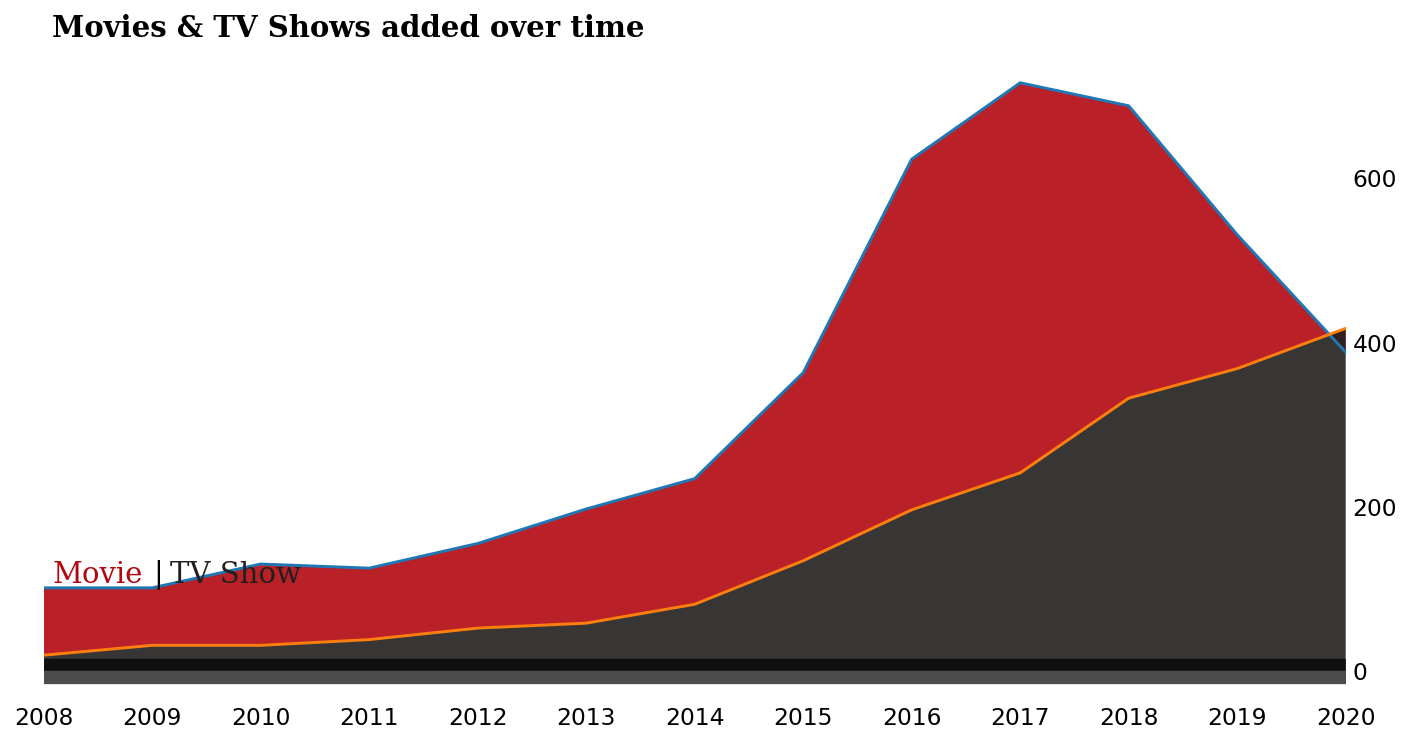

In [250]:
fig_mediaOverTime, ax_mediaOverTime = plt.subplots(figsize=(12,6))

#fig_mediaOverTime.suptitle('Movies & TV Shows added over time', x=0.1, y=.95, horizontalalignment='left', verticalalignment='top', fontsize = 15,fontfamily='serif',fontweight='bold')
fig_mediaOverTime.text(0.13,0.9,'Movies & TV Shows added over time', fontsize = 15,fontfamily='serif',fontweight='bold')

#ax_mediaOverTime.stackplot(ymovie.index,ymovie.values,ytv.values,colors=['#221f1f','#b20710'],alpha=0.9)
ax_mediaOverTime.plot(ymovie.index,ymovie.values,ymovie.index,ytv.values)


ax_mediaOverTime.yaxis.tick_right()
ax_mediaOverTime.set_xticks(np.arange(2008, 2021, 1))
ax_mediaOverTime.set_yticks(np.arange(0, 1400, 200))
ax_mediaOverTime.set_xlim(2008,2020)

ax_mediaOverTime.tick_params(labelsize=12,length=0)
ax_mediaOverTime.grid(False)

ax_mediaOverTime.axhline(y=0,color='black',lw=13,alpha=0.7)

#ax_mediaOverTime.text(0.1,0.1,'hi')

ax_mediaOverTime.spines[:].set_visible(False)

fig_mediaOverTime.text(x=0.13,y=0.25,s='Movie',color='#b20710',fontfamily='serif',fontsize=15)
fig_mediaOverTime.text(x=0.19,y=0.25,s='|',color='black',fontfamily='serif',fontsize=15)
fig_mediaOverTime.text(x=0.2,y=0.25,s='TV Show',color='#221f1f',fontfamily='serif',fontsize=15)


ax_mediaOverTime.fill_between(ymovie.index,ymovie.values,ytv.values,facecolor='#b20710',alpha=0.9)
ax_mediaOverTime.fill_between(ymovie.index,ytv.values,0,facecolor='#221f1f',alpha=0.9);

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
<b>سلول جواب‌ساز</b>
</font>
</h2>


In [226]:
import zlib
import zipfile
import joblib

joblib.dump(fig_ratio,"fig_ratio")
joblib.dump(fig_top10,"fig_top10")
joblib.dump(fig_mediaOverTime,"fig_mediaOverTime")

def compress(file_names):
    print("File Paths:")
    print(file_names)
    # Select the compression mode ZIP_DEFLATED for compression
    # or zipfile.ZIP_STORED to just store the file
    compression = zipfile.ZIP_DEFLATED
    # create the zip file first parameter path/name, second mode
    with zipfile.ZipFile("result.zip", mode="w") as zf:
        for file_name in file_names:
            # Add file to the zip file
            # first parameter file to zip, second filename in zip
            zf.write('./' + file_name, file_name, compress_type=compression)


file_names = ["fig_ratio","fig_top10","fig_mediaOverTime", "netflix.ipynb"]
compress(file_names)

File Paths:
['fig_ratio', 'fig_top10', 'fig_mediaOverTime', 'netflix.ipynb']
